# Segmentador de imágenes BEiT - MS

## Instrucciones
Here is how to use this model for semantic segmentation:

```python
from transformers import BeitFeatureExtractor, BeitForSemanticSegmentation
from datasets import load_dataset
from PIL import Image

# load ADE20k image
ds = load_dataset("hf-internal-testing/fixtures_ade20k", split="test")
image = Image.open(ds[0]['file'])

feature_extractor = BeitFeatureExtractor.from_pretrained('microsoft/beit-base-finetuned-ade-640-640')
model = BeitForSemanticSegmentation.from_pretrained('microsoft/beit-base-finetuned-ade-640-640')

inputs = feature_extractor(images=image, return_tensors="pt")
outputs = model(**inputs)
# logits are of shape (batch_size, num_labels, height/4, width/4)
logits = outputs.logits
```

Currently, both the feature extractor and model support PyTorch.

In [ ]:
# En la línea de abajo decía que no hay un 'datasets' entonces toca:
# !pip install datasets

In [1]:
from PIL import Image
# Carga tu imagen
image = Image.open(r"C:\Users\pc\Pictures\habitacion estudiante 2.jpg")

In [2]:
from transformers import BeitFeatureExtractor, BeitForSemanticSegmentation
import matplotlib.pyplot as plt
feature_extractor = BeitFeatureExtractor.from_pretrained('microsoft/beit-base-finetuned-ade-640-640')
model = BeitForSemanticSegmentation.from_pretrained('microsoft/beit-base-finetuned-ade-640-640')

C:\Users\pc\anaconda3\lib\site-packages\torch\functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  C:\b\abs_bao0hdcrdh\croot\pytorch_1675190257512\work\aten\src\ATen\native\TensorShape.cpp:2895.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [3]:
inputs = feature_extractor(images=image, return_tensors="pt")
outputs = model(**inputs)

In [4]:
logits = outputs.logits

## Sugerencia para visualización de la imagen segmentada:
Explicado paso a paso
```python
# Importa la biblioteca Matplotlib para visualización
import matplotlib.pyplot as plt

# Logits contiene las predicciones crudas del modelo, asegúrate de que logits tenga el formato adecuado para tu modelo y tarea.

# Supongamos que tienes logits en el formato (batch_size, num_labels, height, width), donde:
# - batch_size es el número de imágenes en el lote.
# - num_labels es el número de clases de segmentación.
# - height y width son las dimensiones de la imagen.

# Por ejemplo, si solo tienes una imagen (batch_size=1):
# Supongamos que tienes 21 clases de segmentación (num_labels=21):
# Y que la imagen es de 640x640 píxeles:

# Visualizar la máscara de segmentación para la primera imagen del lote (si tienes más de una imagen, ajusta el índice):
segmentation_mask = logits[0]  # Obtén la máscara de segmentación de la primera imagen

# Supongamos que deseas visualizar la máscara de la clase 0 (cambia el índice según tus clases):
class_index = 0
segmentation_mask_for_class = segmentation_mask[class_index]

# Aplica una función de activación para obtener probabilidades o binarización según sea necesario:
# Por ejemplo, si deseas aplicar la función softmax para obtener probabilidades:
# import torch
# segmentation_mask_probs = torch.softmax(segmentation_mask_for_class, dim=0)

# Si solo deseas binarizar la máscara (por ejemplo, para una visualización simple):
threshold = 0.5  # Establece un umbral de binarización
segmentation_mask_binary = segmentation_mask_for_class > threshold

# Visualiza la máscara binaria:(Negro lo que identifica, blanco lo que ignora)
plt.imshow(segmentation_mask_binary, cmap='binary')
plt.show()
```
### Por otro lado, si lo que deseo es ver una imagen particular, es mejor el código:
```python
# Visualizar la máscara de segmentación
import matplotlib.pyplot as plt
plt.imshow(logits[0][0].detach().cpu().numpy(), cmap='viridis')  # Asegúrate de ajustar los índices según tu formato de salida
plt.show()
```
Donde:

Este código asume que estás trabajando con un solo lote de imágenes (batch_size=1) y que deseas visualizar la máscara de segmentación para la primera imagen del lote ([0]). Además, asume que los logits están en un formato donde [0][0] se refiere a la máscara de segmentación de una clase específica para esa imagen.

El fragmento logits[0][0] se utiliza para acceder a la máscara de segmentación de la primera imagen y la clase específica (debes ajustar los índices según tu formato de salida). Luego, detach() se utiliza para desvincular el tensor de cualquier gráfico de cálculo de PyTorch, cpu() lo traslada a la CPU si estaba en la GPU y numpy() lo convierte en un arreglo NumPy para que pueda ser visualizado por Matplotlib.

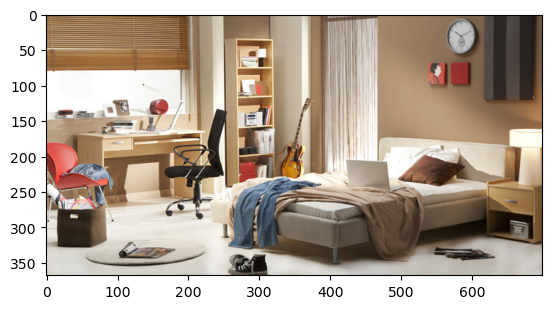

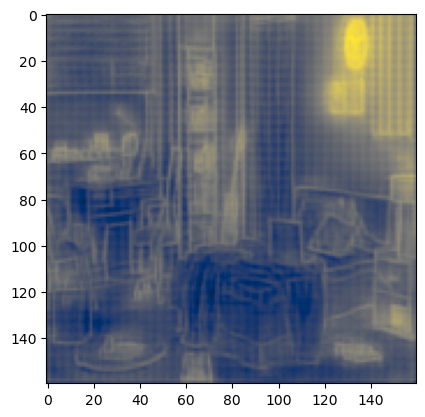

In [5]:
''' voy a intentar visualizar la imagen "habitación" que descargué de internet. Al ejecutarla en la pag web de Hugging Face 
ya me hice a una idea de lo que debería ver a continuación '''
plt.imshow(image)
plt.show()
ind = 148
plt.imshow(logits[0][ind].detach().cpu().numpy(), cmap='cividis')
plt.show()
    # Asegúrate de ajustar los índices según tu formato de salida
#plt.imshow(logits[0][ind].detach().cpu().numpy(), cmap='coolwarm') 
#plt.show()

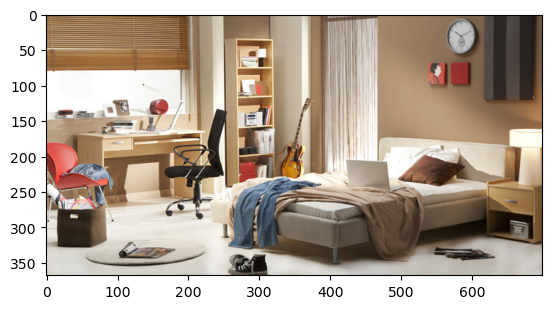

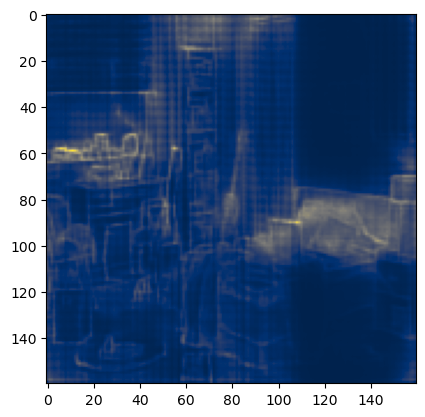

In [14]:
''' De la imagen "habitación" que descargué de internet, quiero especificarle varios índices de varios objetos 
(por ahora escritos en enteros manualmente) y que cada objeto lo realce en el mismo mapa (matplotlib) 
pero con colores diferentes '''
plt.imshow(image)
plt.show()
# [reloj, escritorio, piso, almohada] = [148,33,3,57]
'''
segmentation_mask = logits[0]  # Obtén la máscara de segmentación de la primera imagen

class_index = 148
segmentation_mask_for_class = segmentation_mask[class_index]

# Aplica una función de activación para obtener probabilidades o binarización según sea necesario:
# Por ejemplo, si deseas aplicar la función softmax para obtener probabilidades:
import torch
segmentation_mask_probs = torch.softmax(segmentation_mask_for_class, dim=0)

# Visualiza la máscara de ´robabilidad. 
plt.imshow(segmentation_mask_probs.detach().numpy(), cmap='cividis')
plt.show() 

# Establece un umbral de binarización
threshold = 0.5  
segmentation_mask_binary = segmentation_mask_for_class > threshold

# Visualiza la máscara binaria:
plt.imshow(segmentation_mask_binary, cmap='binary')
plt.show()
'''
# ____________________

# Visualizar la máscara de segmentación para la primera imagen del lote (si tienes más de una imagen, ajusta el índice):
segmentation_mask = logits[0]  # Obtén la máscara de segmentación de la primera imagen

# Supongamos que deseas visualizar la máscara de la clase 0 (cambia el índice según tus clases):
class_index = 57
segmentation_mask_for_class = segmentation_mask[class_index]

# Aplica una función de activación para obtener probabilidades:
segmentation_mask_probs = torch.softmax(segmentation_mask_for_class, dim=0)

# Aplica una transformación para resaltar áreas con alta probabilidad:
# Puedes experimentar con diferentes funciones de transformación y valores
transformed_probs = segmentation_mask_probs ** 0.5  # Ejemplo: potenciación de 0.5

# Visualiza la máscara de probabilidad con la transformación:
plt.imshow(transformed_probs.detach().numpy(), cmap='cividis')
plt.show()


#plt.imshow(logits[0][class_index].detach().cpu().numpy(), cmap='cividis')
#plt.show()

C:\Users\pc\AppData\Local\Temp\ipykernel_3040\880011201.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('tab20', num_classes)  # 'tab20' tiene 20 colores diferentes


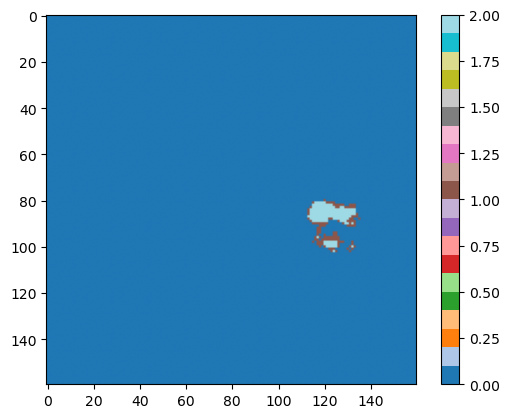

In [16]:
# Supongamos que tienes la máscara de segmentación para una imagen con múltiples clases
# La máscara debe ser un tensor de dimensiones (height, width), donde cada valor representa la clase.

# Define un colormap personalizado con colores diferentes para cada clase
# Puedes definir tus propios colores como una lista de tuplas (R, G, B) o usar colormaps predefinidos
# Aquí, usaremos colores de colormaps predefinidos para ejemplificar:
num_classes=3
colormap = plt.cm.get_cmap('tab20', num_classes)  # 'tab20' tiene 20 colores diferentes
segmentation_mask = logits[0]
class_index = 57
segmentation_mask_for_class = segmentation_mask[class_index]

# Supongamos que tienes num_classes clases en tu máscara de segmentación

# Visualiza la máscara de segmentación con colores asignados a cada clase
plt.imshow(colormap(segmentation_mask_for_class.detach().numpy()), cmap='tab20', vmin=0, vmax=num_classes - 1)
plt.colorbar()  # Agrega una barra de colores para mostrar la correspondencia entre clases y colores
plt.show()

In [17]:
import numpy as np
# Supongamos que tienes la imagen original en una variable llamada "image"
# y logits que contiene las máscaras de segmentación (batch_size, num_labels, height, width).

# Elije las clases que deseas visualizar y los colores correspondientes.
# Por ejemplo, supongamos que deseas visualizar las clases 0, 1 y 2 con colores diferentes.
classes_to_visualize = [0, 1, 2]
colors = ['red', 'green', 'blue']  # Asigna un color a cada clase.

# Selecciona la imagen y las máscaras de segmentación para la primera imagen en el lote.
image_to_visualize = image
masks_to_visualize = logits[0]

# Crea una máscara de colores en blanco y negro para superponer.
# Inicialmente, todo en blanco (valor 255) para la imagen original.
colored_mask = np.ones_like(image_to_visualize) * 255

# Redimensiona la máscara para que coincida con el tamaño de la imagen.
# Esto asume que las dimensiones de la máscara son diferentes de las de la imagen.
# Ajusta estas líneas según tus dimensiones específicas.
colored_mask = np.transpose(colored_mask, (1, 2, 0))
print(type(plt.cm.colors.to_rgba(color)[:-1] * 255))
# Superpone las máscaras de colores para las clases seleccionadas.
for class_idx, color in zip(classes_to_visualize, colors):
    # Crea una máscara binaria para la clase actual.
    class_mask = masks_to_visualize[class_idx] > 0.5  # Aplica un umbral si es necesario.
    
    # Asigna el color correspondiente a los píxeles de la máscara de colores.
    colored_mask[class_mask] = plt.cm.colors.to_rgba(color)[:-1] * 255

# Redimensiona la máscara nuevamente a las dimensiones originales.
colored_mask = np.transpose(colored_mask, (2, 0, 1))

# Visualiza la imagen con las clases marcadas en colores diferentes.
plt.imshow(colored_mask.astype(np.uint8))
plt.show()


<class 'tuple'>


IndexError: boolean index did not match indexed array along dimension 0; dimension is 700 but corresponding boolean dimension is 160

In [15]:
import numpy as np
classes_to_visualize = [0, 1, 2]
colors = ['red', 'green', 'blue']  # Asigna un color a cada clase.

image_to_visualize = image
masks_to_visualize = logits[0]

colored_mask = np.ones_like(image_to_visualize) * 255

colored_mask = np.transpose(colored_mask, (1, 2, 0))
threshold = 0.5

for class_idx, color in zip(classes_to_visualize, colors):
    class_mask = masks_to_visualize[class_idx] > threshold
    colored_mask[class_mask] = plt.cm.colors.to_rgba(color)[:-1] * 255


colored_mask = np.transpose(colored_mask, (2, 0, 1))

plt.imshow(colored_mask.astype(np.uint8))
plt.show()

IndexError: boolean index did not match indexed array along dimension 0; dimension is 700 but corresponding boolean dimension is 160

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Supongamos que tienes la imagen original en una variable llamada "image"
# y logits que contiene las máscaras de segmentación (batch_size, num_labels, height, width).

# Elije las clases que deseas visualizar y los colores correspondientes.
# Por ejemplo, supongamos que deseas visualizar las clases 0, 1 y 2 con colores diferentes.
classes_to_visualize = [0, 1, 2]
colors = ['red', 'green', 'blue']  # Asigna un color a cada clase.

# Selecciona la imagen y las máscaras de segmentación para la primera imagen en el lote.
image_to_visualize = image
masks_to_visualize = logits[0]

# Obtén las dimensiones de la imagen original.
height, width = image_to_visualize.height, image_to_visualize.width

# Crea una máscara de colores en blanco y negro para superponer.
# Inicialmente, todo en blanco (valor 255) para la imagen original.
colored_mask = np.ones((height, width, 3), dtype=np.uint8) * 255

# Superpone las máscaras de colores para las clases seleccionadas.
for class_idx, color in zip(classes_to_visualize, colors):
    # Crea una máscara binaria para la clase actual y redimensiona según las dimensiones de la imagen original.
    class_mask = masks_to_visualize[class_idx] > threshold  # Aplica un umbral si es necesario.
    class_mask = class_mask.astype(np.uint8)  # Convierte la máscara a tipo uint8
    class_mask = np.expand_dims(class_mask, axis=-1)  # Añade una dimensión de canal (1 canal).

    # Asigna el color correspondiente a los píxeles de la máscara de colores.
    colored_mask[class_mask > 0] = np.array(plt.cm.colors.to_rgba(color)[:-1]) * 255

# Visualiza la imagen con las clases marcadas en colores diferentes.
plt.imshow(colored_mask)
plt.show()

NameError: name 'threshold' is not defined

In [11]:
import matplotlib.pyplot as plt, matplotlib
import numpy as np

# Supongamos que tienes logits que contienen las máscaras de segmentación.
# Y supongamos que tienes una lista de clases que deseas visualizar.
clases_a_visualizar = [0, 1, 2]  # Puedes ajustar esta lista según las clases que desees visualizar

# Crea una paleta de colores para cada clase (puedes personalizar los colores).
colores = ['red', 'green', 'blue']  # Ejemplo de colores para las clases

# Combinamos los colores para crear una paleta de colores para todas las clases posibles.
paleta = [colores[i] if i in clases_a_visualizar else 'black' for i in range(logits.shape[1])]

# Visualiza la máscara de segmentación para la primera imagen del lote.
imagen_segmentada = logits[0].detach().cpu().numpy()

# Crea una imagen RGB donde cada clase se representa con un color diferente.
imagen_rgb = np.zeros((imagen_segmentada.shape[0], imagen_segmentada.shape[1], 3), dtype=np.uint8)

for i, clase in enumerate(clases_a_visualizar):
    # Asigna el color correspondiente a la clase en la imagen RGB.
    imagen_rgb[imagen_segmentada[i] == 1] = np.array(matplotlib.colors.to_rgb(paleta[i])) * 255

# Visualiza la imagen segmentada con colores asignados a cada clase.
plt.imshow(imagen_rgb)
plt.show()


IndexError: boolean index did not match indexed array along dimension 0; dimension is 150 but corresponding boolean dimension is 160

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors

# Supongamos que tienes logits que contienen las máscaras de segmentación.
# Y supongamos que tienes una lista de clases que deseas visualizar.
clases_a_visualizar = [0, 1, 2]  # Puedes ajustar esta lista según las clases que desees visualizar

# Crea una paleta de colores para cada clase (puedes personalizar los colores).
colores = ['red', 'green', 'blue']  # Ejemplo de colores para las clases

# Combinamos los colores para crear una paleta de colores para todas las clases posibles.
paleta = [colores[i] if i in clases_a_visualizar else 'black' for i in range(logits.shape[1])]

# Visualiza la máscara de segmentación para la primera imagen del lote.
imagen_segmentada = logits[0].detach().cpu().numpy()

# Crea una imagen RGB donde cada clase se representa con un color diferente.
imagen_rgb = np.zeros((imagen_segmentada.shape[0], imagen_segmentada.shape[1], 3), dtype=np.uint8)

for i, clase in enumerate(clases_a_visualizar):
    # Asigna el color correspondiente a la clase en la imagen RGB.
    imagen_rgb[imagen_segmentada[i] == 1] = np.array(matplotlib.colors.to_rgb(paleta[i])) * 255

# Visualiza la imagen segmentada con colores asignados a cada clase.
plt.imshow(imagen_rgb)
plt.show()


IndexError: boolean index did not match indexed array along dimension 0; dimension is 150 but corresponding boolean dimension is 160